In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from functions_pbp import get_play_by_play
from functions_pbp import create_home_delta_plot
from functions_pbp import get_all_nba_games
from nba_api.stats.endpoints import playbyplayv2
import numpy as np

In [2]:
# Load your data (adjust the path to your actual data file)
nba_games_id = pd.read_csv('nba_games_id.csv',  
                            dtype= {'	Unnamed: 0':str, 
                            'GAME_ID':str,
                            'MATCHUP':str})[["GAME_ID","MATCHUP"]]
nba_games_id

,GAME_ID,MATCHUP
0,0022000001,BKN vs. GSW
1,0022000002,LAC @ LAL
2,0022000002,LAL vs. LAC
3,0022000001,GSW @ BKN
4,0022000020,UTA @ POR
...,...,...
4615,0022101217,WAS @ CHA
4616,0022101228,PHI vs. DET
4617,0022101228,DET @ PHI
4618,0022101221,ATL @ HOU


(2884, 2)
(3060, 4)


/Users/eduardogarcia/Documents/GitHub/playbyplay/functions_pbp.py:43: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['HomeScore'] = merged_df['HomeScore'].fillna(method='bfill')
/Users/eduardogarcia/Documents/GitHub/playbyplay/functions_pbp.py:44: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['AwayScore'] = merged_df['AwayScore'].fillna(method='bfill')


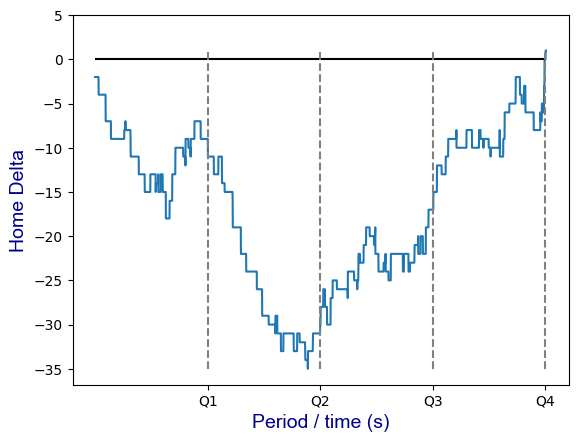

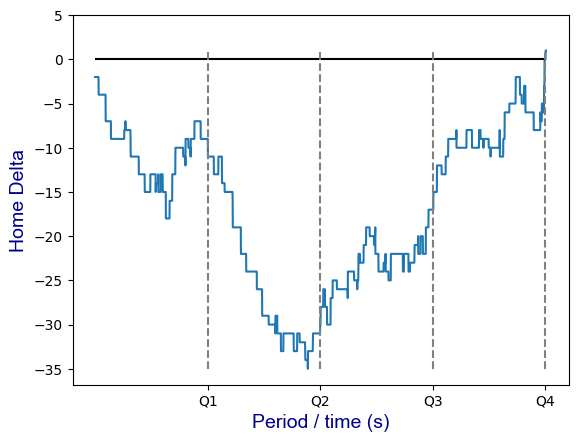

In [3]:
game_id = list((nba_games_id.sample(1)["GAME_ID"]))[0]
df = get_play_by_play(game_id)
create_home_delta_plot(df)

In [4]:
df.shape

(2884, 4)

(2884, 2)
(3066, 4)


/Users/eduardogarcia/Documents/GitHub/playbyplay/functions_pbp.py:43: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['HomeScore'] = merged_df['HomeScore'].fillna(method='bfill')
/Users/eduardogarcia/Documents/GitHub/playbyplay/functions_pbp.py:44: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['AwayScore'] = merged_df['AwayScore'].fillna(method='bfill')


Text(0, 0.5, 'Home Delta')

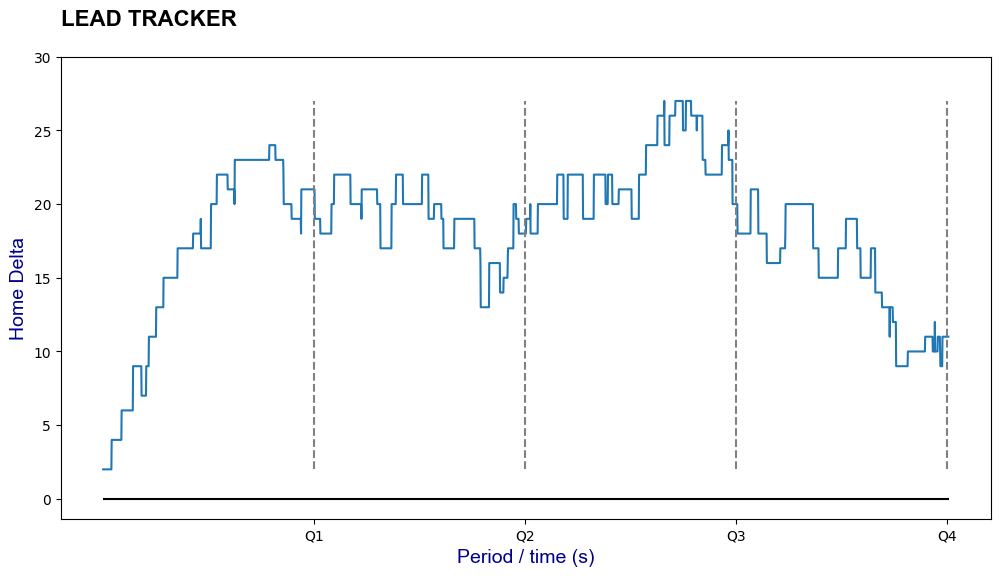

In [5]:
font = {'family': 'arial',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 14,
        }

title_font = {'family': 'arial',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }


game_id = list((nba_games_id.sample(1)["GAME_ID"]))[0]
df = get_play_by_play(game_id)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df['HomeDelta'])
ax.hlines(y=0,         xmin=0,      xmax=df.shape[0],       colors='black')
for period in range(1,5):
    ax.vlines(x=(60*12*period), 
              ymin=df['HomeDelta'].min(), 
              ymax=df['HomeDelta'].max(), 
              colors='gray',
              ls = '--'
              )
for period in range(5,(df['PERIOD'].max()+1)):
    ax.vlines(x=(60*5*period),
              ymin=df['HomeDelta'].min()//5, 
              ymax=df['HomeDelta'].max(), 
              colors='gray',
              ls = '--'
              )
y_ticks = np.arange(((df['HomeDelta'].min()//5))*5, ((df['HomeDelta'].max()//5)+2)*5, 5)
plt.yticks(y_ticks)

x_labels = [(12*60*1),(12*60*2),(12*60*3),(12*60*4)]
plt.xticks(x_labels,labels=['Q1','Q2','Q3','Q4'])
plt.title("LEAD TRACKER\n ",fontdict=title_font, loc='left')
plt.xlabel('Period / time (s)', fontdict=font)
plt.ylabel('Home Delta', fontdict=font)


In [16]:
df_dates = get_all_nba_games(2022)
df_dates.sort_values('GAME_DATE').reset_index(drop=True)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22022,1610612744,GSW,Golden State Warriors,0022200002,2022-10-18,GSW vs. LAL,W,240,45,...,37,48,31,11,4,18,23,123,14,1
1,22022,1610612738,BOS,Boston Celtics,0022200001,2022-10-18,BOS vs. PHI,W,240,46,...,30,36,24,8,3,11,24,126,9,1
2,22022,1610612751,BKN,Brooklyn Nets,0022200006,2022-10-19,BKN vs. NOP,L,240,40,...,30,39,22,10,10,16,25,108,-22,1
3,22022,1610612762,UTA,Utah Jazz,0022200012,2022-10-19,UTA vs. DEN,W,240,42,...,32,43,27,10,1,20,21,123,21,1
4,22022,1610612756,PHX,Phoenix Suns,0022200013,2022-10-19,PHX vs. DAL,W,240,40,...,32,40,25,4,5,12,29,107,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,42022,1610612743,DEN,Denver Nuggets,0042200401,2023-06-01,DEN vs. MIA,W,240,40,...,39,45,29,4,4,10,8,104,11,1
1310,42022,1610612743,DEN,Denver Nuggets,0042200402,2023-06-04,DEN vs. MIA,L,240,39,...,29,38,23,7,2,14,21,108,-3,1
1311,42022,1610612748,MIA,Miami Heat,0042200403,2023-06-07,MIA vs. DEN,L,240,34,...,23,33,20,7,3,4,22,94,-15,1
1312,42022,1610612748,MIA,Miami Heat,0042200404,2023-06-09,MIA vs. DEN,L,240,35,...,29,37,23,2,3,15,19,95,-13,1


In [7]:
list(df_dates.loc[df_dates['GAME_DATE']=='2022-10-18']['MATCHUP'])

['GSW vs. LAL', 'BOS vs. PHI']

In [8]:
df_dates.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

In [9]:
df_dates['GAME_DATE'].min()

'2022-10-18'

In [10]:
from datetime import datetime

date_str = df_dates['GAME_DATE'].min()
date_obj = datetime.strptime(date_str, '%Y-%m-%d').date()

print(type(date_obj))
date_obj


<class 'datetime.date'>


datetime.date(2022, 10, 18)

In [11]:
from datetime import datetime

date_str = df_dates['GAME_DATE'].max()
date_obj = datetime.strptime(date_str, '%Y-%m-%d').date()

print(type(date_obj))
date_obj

<class 'datetime.date'>


datetime.date(2023, 6, 12)

In [12]:
selected_date = df_dates['GAME_DATE'].min()
list(df_dates['MATCHUP'].loc[df_dates['GAME_DATE'] == selected_date])

['GSW vs. LAL', 'BOS vs. PHI']

In [13]:
date_str = "2022/12/31"
transformed_date_str = date_str.replace("/", "-")
print(transformed_date_str)


selected_date==transformed_date_str


2022-12-31


False

In [14]:
daily_matches = list(df_dates['MATCHUP'].loc[df_dates['GAME_DATE']==selected_date])
daily_matches

['GSW vs. LAL', 'BOS vs. PHI']

In [15]:
str(df_dates['GAME_ID'][0])

'0042200111'